1. Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import sklearn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.manifold import TSNE

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [11]:
boston.data.shape

(506, 13)

Создайте датафреймы X и y из этих данных.

In [12]:
x = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [13]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y = pd.DataFrame(data = boston.target,columns = ['Target'])

In [15]:
y.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [16]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler. 

In [17]:
scaler = StandardScaler()

In [18]:
x_train_scaled = scaler.fit_transform(x_train)

In [19]:
x_test_scaled = scaler.transform(x_test)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. 

In [20]:
tsne = TSNE(n_components = 3, learning_rate=250,random_state=42)

In [21]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

In [22]:
x_train_tsne

array([[  -7.5334635,  -60.054256 ,   49.04332  ],
       [ 103.71561  ,   16.506395 ,  -27.329777 ],
       [  70.28147  ,  -62.930767 ,  -19.585567 ],
       ...,
       [ -32.518715 ,    5.212025 , -110.38491  ],
       [   4.7565627,  -93.51519  ,   92.55538  ],
       [  94.77482  ,  -48.289803 ,   47.976414 ]], dtype=float32)

In [23]:
x_train_tsne.shape

(404, 3)

Постройте диаграмму рассеяния на этих данных.

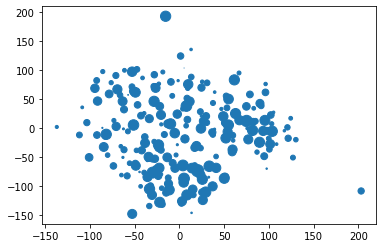

In [25]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2])

2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

In [28]:
labels_train = kmeans.fit_predict(x_train)

In [29]:
labels_train

array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

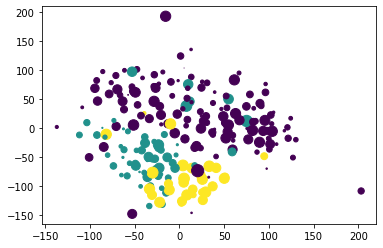

In [31]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [32]:
CRIM = [x_train['CRIM'][labels_train == i].mean() for i in range(0,3) ]

In [33]:
CRIM

[0.40486282828282844, 11.745661842105266, 14.360380322580648]

In [34]:
price = [float(y_train[labels_train == i].mean()) for i in range(0,3) ]

In [35]:
price

[25.168686868686873, 17.4421052631579, 13.196774193548386]

In [36]:
pd.DataFrame(data=[CRIM,price],columns=['Кластер 1','Кластер 2','Кластер 3'], index=['CRIM','price'])

,Кластер 1,Кластер 2,Кластер 3
CRIM,0.404863,11.745662,14.360380
price,25.168687,17.442105,13.196774


3. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [37]:
labels_test = kmeans.fit_predict(x_test)

In [38]:
CRIM = [x_test['CRIM'][labels_test == i].mean() for i in range(0,3) ]

In [41]:
CRIM

[0.2464211594202899, 8.469301923076923, 19.021665714285714]

In [39]:
price = [float(y_test[labels_test == i].mean()) for i in range(0,3) ]

In [42]:
price

[23.911594202898552, 17.39230769230769, 12.814285714285713]

In [40]:
pd.DataFrame(data=[CRIM,price],columns=['Кластер 1','Кластер 2','Кластер 3'], index=['CRIM','price'])

,Кластер 1,Кластер 2,Кластер 3
CRIM,0.246421,8.469302,19.021666
price,23.911594,17.392308,12.814286
